In [1]:
!pip install kaggle


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")  # replace with the correct path if needed

# Preview
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Count zero values in relevant columns
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    print(f"{col}: {(df[col] == 0).sum()} zeros")


Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Columns with invalid zero entries
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Fill NaN with median values
df[zero_cols] = df[zero_cols].fillna(df[zero_cols].median())

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Count zero values in relevant columns
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    print(f"{col}: {(df[col] == 0).sum()} zeros")

Glucose: 0 zeros
BloodPressure: 0 zeros
SkinThickness: 0 zeros
Insulin: 0 zeros
BMI: 0 zeros


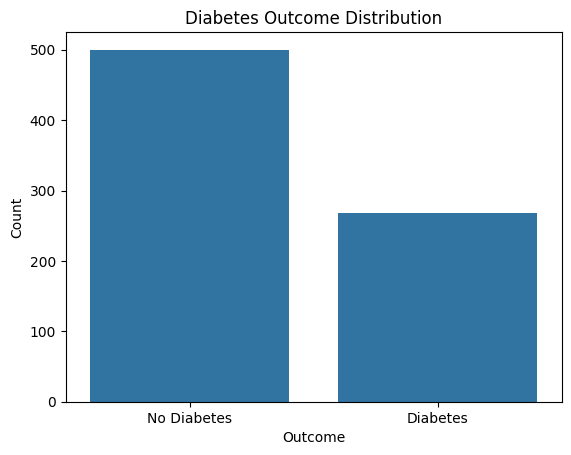

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Diabetes Outcome Distribution")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel("Count")
plt.show()


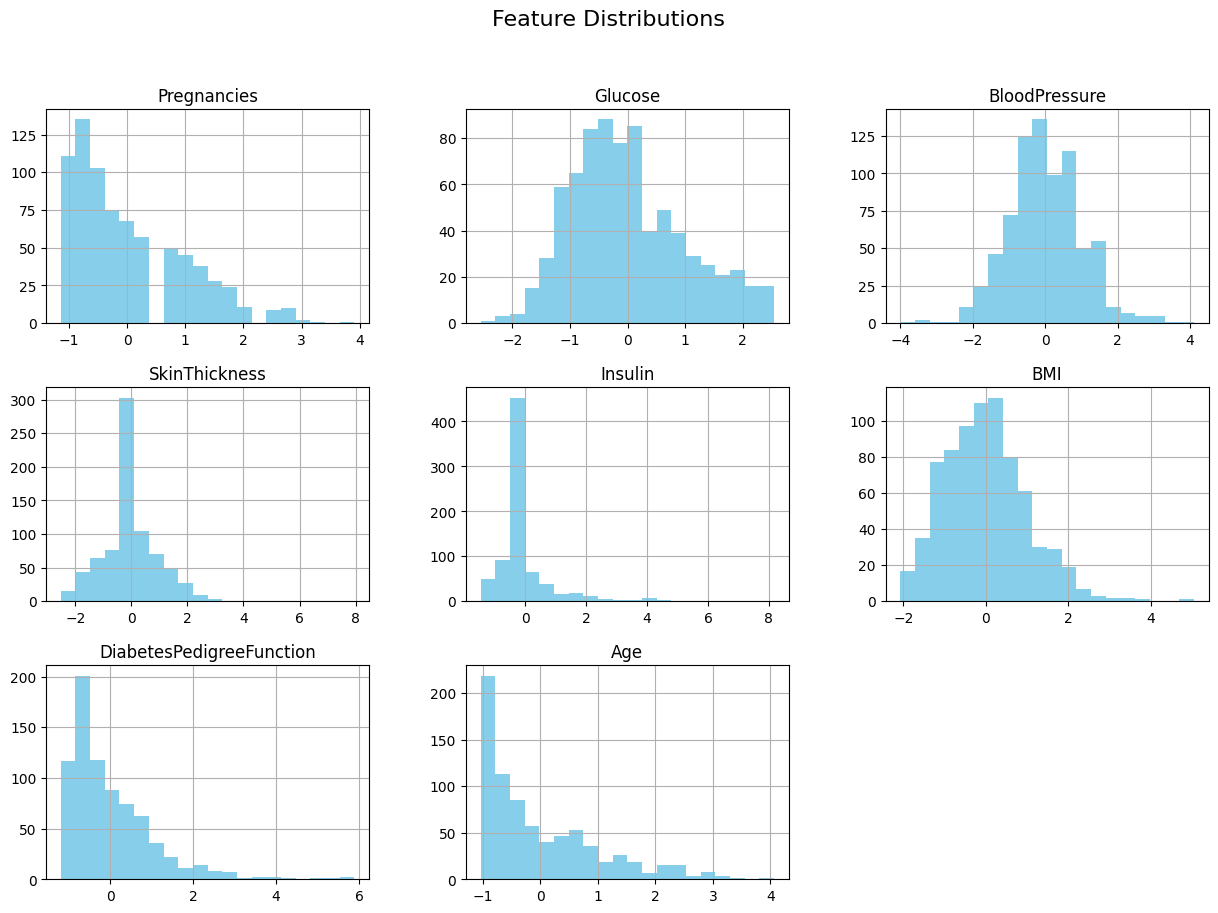

In [7]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

X_df.hist(bins=20, figsize=(15,10), color="skyblue")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


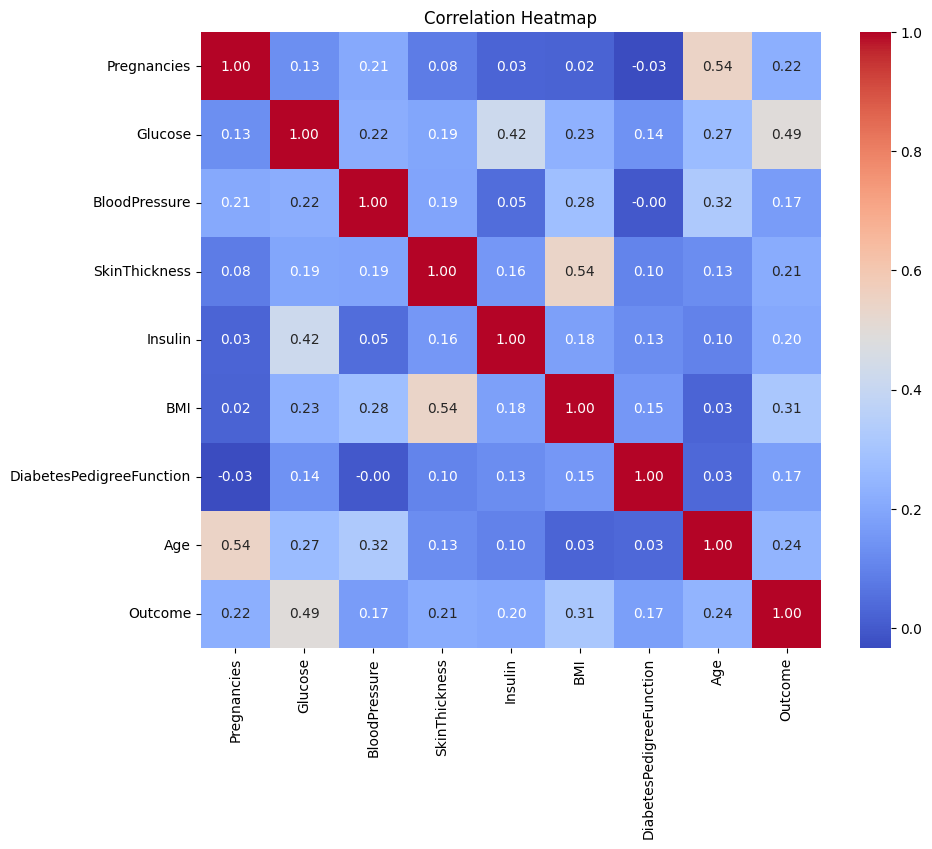

In [8]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


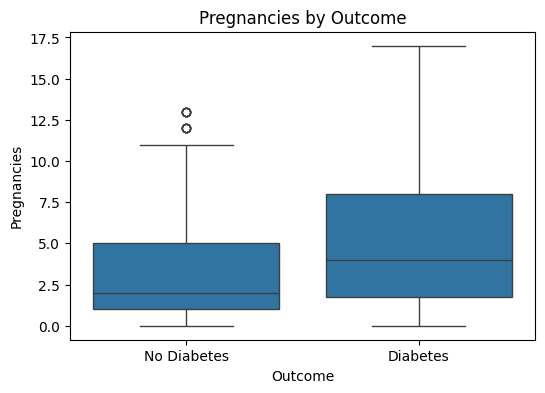

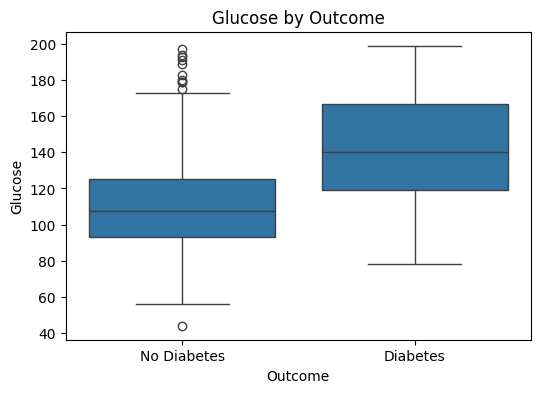

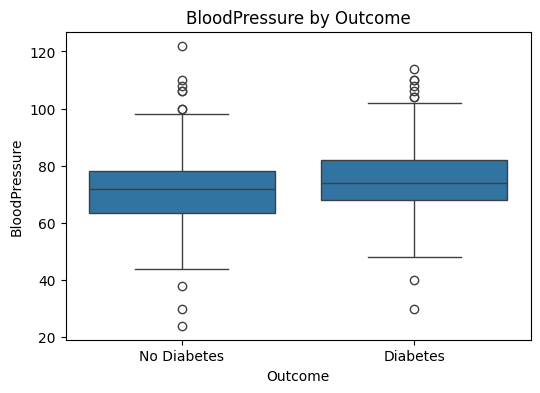

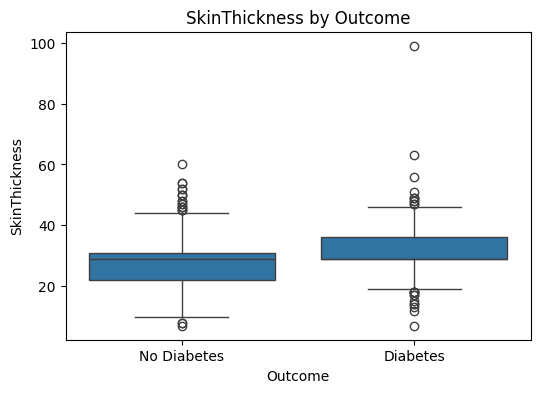

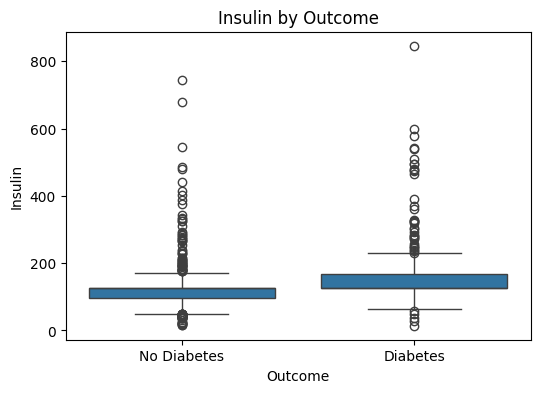

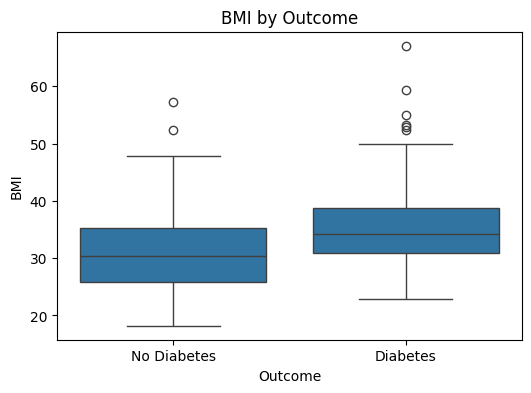

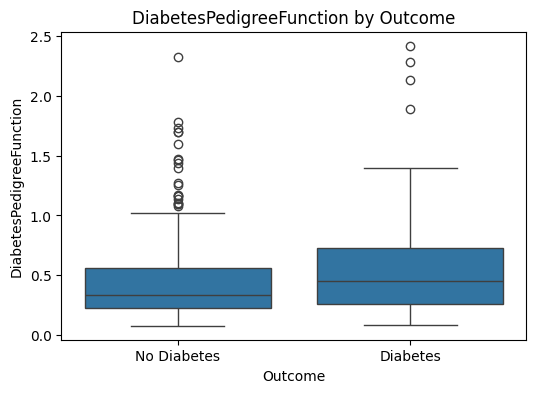

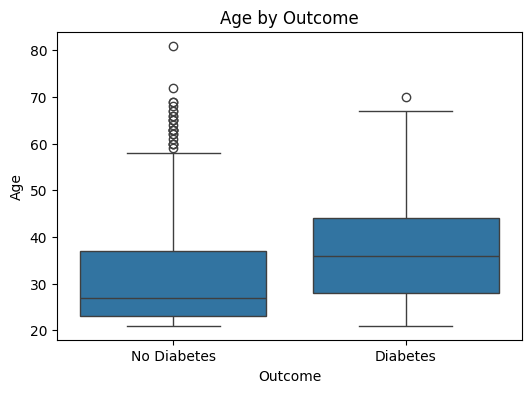

In [9]:
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=df[col])
    plt.title(f"{col} by Outcome")
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



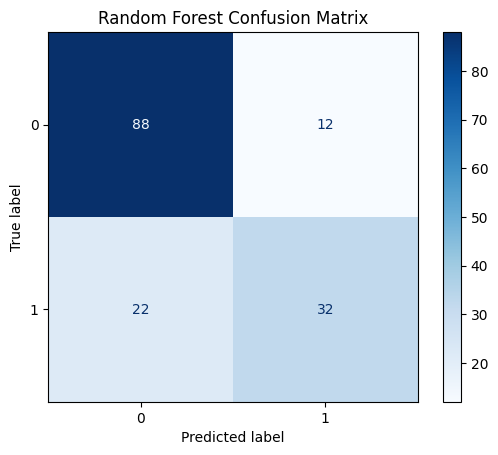

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [14]:
!pip install shap --quiet



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import shap


In [18]:
import shap

# Create explainer for the trained Random Forest
explainer = shap.TreeExplainer(rf)

# Explain predictions on test set
shap_values = explainer.shap_values(X_test)



In [20]:
import numpy as np

print("SHAP values shape:", np.shape(shap_values))
print("X_test_df shape:", X_test_df.shape)




SHAP values shape: (154, 8, 2)
X_test_df shape: (154, 8)


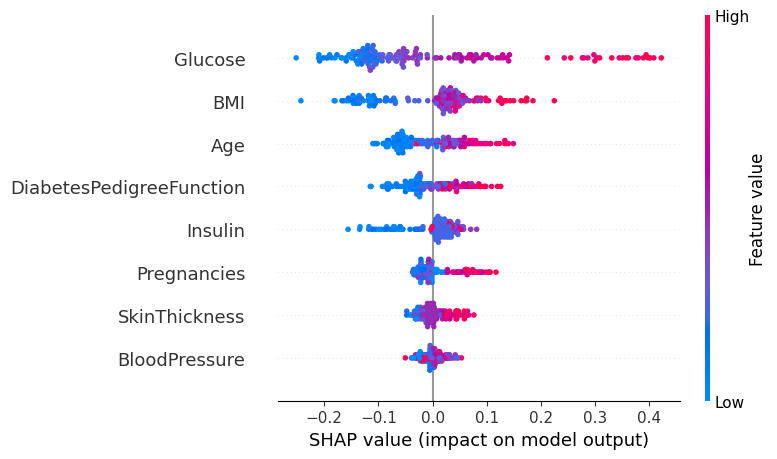

In [21]:
# Get SHAP values for class 1 (diabetic)
shap_values_class1 = shap_values[:, :, 1]

# Plot summary
shap.summary_plot(shap_values_class1, X_test_df)


In [22]:
import joblib
joblib.dump(rf, "diabetes_model.pkl")


['diabetes_model.pkl']